Iris Classification using:

    - Random Forest
    - XGBoost
    - Support Vector Machine
    - K-Nearest Neighbors

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/330px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg" width=150 />


Libraries

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, KFold

Reading data

In [43]:
df = pd.read_csv("/home/newmant1/luna/Kaggle/Iris/archive/Iris.csv")
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Splitting data into explanatory and response variables

In [44]:
X = df.drop('species', axis=1)
y = df['species']

Splittng data into training and testing sets: 80/20 split

In [45]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using KFold cross validation with an 80/20 split

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

<br><br><br>

## A. Random Forest


In [47]:
from sklearn.ensemble import RandomForestClassifier

Model

In [48]:
n_trees = 100
rf_clf = RandomForestClassifier(n_estimators=n_trees, random_state=27)

Evaluate the model's performance using 5-fold cross validation

In [49]:
rf_cv_scores = cross_validate(rf_clf, X, y, cv=kf, scoring=scoring)

print("----------------------------------------------------")
print(f'Cross-validation accuracy scores: {rf_cv_scores["test_accuracy"]}')
print(f'Mean cross-validation accuracy: {rf_cv_scores["test_accuracy"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation precision scores: {rf_cv_scores["test_precision_macro"]}')
print(f'Mean cross-validation precision: {rf_cv_scores["test_precision_macro"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation recall scores: {rf_cv_scores["test_recall_macro"]}')
print(f'Mean cross-validation recall: {rf_cv_scores["test_recall_macro"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation F1 scores: {rf_cv_scores["test_f1_macro"]}')
print(f'Mean cross-validation F1: {rf_cv_scores["test_f1_macro"].mean()}')

----------------------------------------------------
Cross-validation accuracy scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean cross-validation accuracy: 0.9533333333333335
----------------------------------------------------
Cross-validation precision scores: [1.         0.96969697 0.93333333 0.93888889 0.94871795]
Mean cross-validation precision: 0.9581274281274281
----------------------------------------------------
Cross-validation recall scores: [1.         0.95238095 0.93333333 0.93888889 0.94444444]
Mean cross-validation recall: 0.9538095238095238
----------------------------------------------------
Cross-validation F1 scores: [1.         0.95848596 0.92592593 0.93888889 0.94191919]
Mean cross-validation F1: 0.9530439930439931


<br><br><br>

## B. XGBoost

In [50]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xgboost model requires output to be in integer format

In [51]:
label_encoder = LabelEncoder()
xgb_df = df
xgb_df['species'] = label_encoder.fit_transform(xgb_df['species'])
xgb_X = df.drop('species', axis=1)
xgb_y = df['species']
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(xgb_X, xgb_y, test_size=0.2, random_state=42)

Model

In [52]:
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=27)

Evaluate the model's performance using 5-fold cross validation

In [53]:
xgb_cv_scores = cross_validate(xgb_clf, xgb_X, xgb_y, cv=kf, scoring=scoring)


print("----------------------------------------------------")
print(f'Cross-validation accuracy scores: {xgb_cv_scores["test_accuracy"]}')
print(f'Mean cross-validation accuracy: {xgb_cv_scores["test_accuracy"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation precision scores: {xgb_cv_scores["test_precision_macro"]}')
print(f'Mean cross-validation precision: {xgb_cv_scores["test_precision_macro"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation recall scores: {xgb_cv_scores["test_recall_macro"]}')
print(f'Mean cross-validation recall: {xgb_cv_scores["test_recall_macro"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation F1 scores: {xgb_cv_scores["test_f1_macro"]}')
print(f'Mean cross-validation F1: {xgb_cv_scores["test_f1_macro"].mean()}')

----------------------------------------------------
Cross-validation accuracy scores: [1.         0.96666667 0.93333333 0.9        0.93333333]
Mean cross-validation accuracy: 0.9466666666666667
----------------------------------------------------
Cross-validation precision scores: [1.         0.96969697 0.93333333 0.89814815 0.94871795]
Mean cross-validation precision: 0.9499792799792799
----------------------------------------------------
Cross-validation recall scores: [1.         0.95238095 0.93333333 0.90555556 0.94444444]
Mean cross-validation recall: 0.9471428571428572
----------------------------------------------------
Cross-validation F1 scores: [1.         0.95848596 0.92592593 0.8999828  0.94191919]
Mean cross-validation F1: 0.9452627752937351


<br><br><br>

## C. Support Vector Machine 

In [54]:
from sklearn.svm import SVC

Model

In [55]:
svm_clf = SVC(kernel='linear', random_state=27)

Evaluate the model's performance using 5-fold cross validation

In [56]:
svm_cv_scores = cross_validate(svm_clf, X, y, cv=kf, scoring=scoring)


print("----------------------------------------------------")
print(f'Cross-validation accuracy scores: {svm_cv_scores["test_accuracy"]}')
print(f'Mean cross-validation accuracy: {svm_cv_scores["test_accuracy"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation precision scores: {svm_cv_scores["test_precision_macro"]}')
print(f'Mean cross-validation precision: {svm_cv_scores["test_precision_macro"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation recall scores: {svm_cv_scores["test_recall_macro"]}')
print(f'Mean cross-validation recall: {svm_cv_scores["test_recall_macro"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation F1 scores: {svm_cv_scores["test_f1_macro"]}')
print(f'Mean cross-validation F1: {svm_cv_scores["test_f1_macro"].mean()}')

----------------------------------------------------
Cross-validation accuracy scores: [1.         1.         0.96666667 0.93333333 0.96666667]
Mean cross-validation accuracy: 0.9733333333333334
----------------------------------------------------
Cross-validation precision scores: [1.         1.         0.96296296 0.95238095 0.97222222]
Mean cross-validation precision: 0.9775132275132276
----------------------------------------------------
Cross-validation recall scores: [1.         1.         0.96666667 0.93333333 0.97222222]
Mean cross-validation recall: 0.9744444444444443
----------------------------------------------------
Cross-validation F1 scores: [1.         1.         0.9628483  0.93732194 0.97101449]
Mean cross-validation F1: 0.9742369454578366


<br><br><br>

## D. K-Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier

Model

In [58]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

Evaluate the model's performance using 5-fold cross validation

In [59]:
knn_cv_scores = cross_validate(knn_clf, X, y, cv=kf, scoring=scoring)


print("----------------------------------------------------")
print(f'Cross-validation accuracy scores: {svm_cv_scores["test_accuracy"]}')
print(f'Mean cross-validation accuracy: {svm_cv_scores["test_accuracy"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation precision scores: {svm_cv_scores["test_precision_macro"]}')
print(f'Mean cross-validation precision: {svm_cv_scores["test_precision_macro"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation recall scores: {svm_cv_scores["test_recall_macro"]}')
print(f'Mean cross-validation recall: {svm_cv_scores["test_recall_macro"].mean()}')
print("----------------------------------------------------")

print(f'Cross-validation F1 scores: {svm_cv_scores["test_f1_macro"]}')
print(f'Mean cross-validation F1: {svm_cv_scores["test_f1_macro"].mean()}')

----------------------------------------------------
Cross-validation accuracy scores: [1.         1.         0.96666667 0.93333333 0.96666667]
Mean cross-validation accuracy: 0.9733333333333334
----------------------------------------------------
Cross-validation precision scores: [1.         1.         0.96296296 0.95238095 0.97222222]
Mean cross-validation precision: 0.9775132275132276
----------------------------------------------------
Cross-validation recall scores: [1.         1.         0.96666667 0.93333333 0.97222222]
Mean cross-validation recall: 0.9744444444444443
----------------------------------------------------
Cross-validation F1 scores: [1.         1.         0.9628483  0.93732194 0.97101449]
Mean cross-validation F1: 0.9742369454578366


<br><br><br>

## Comparing Results

In [85]:
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
plt.style.use('dark_background')

In [75]:
classifier_colors = cm.rainbow(np.linspace(0, 1, 4))

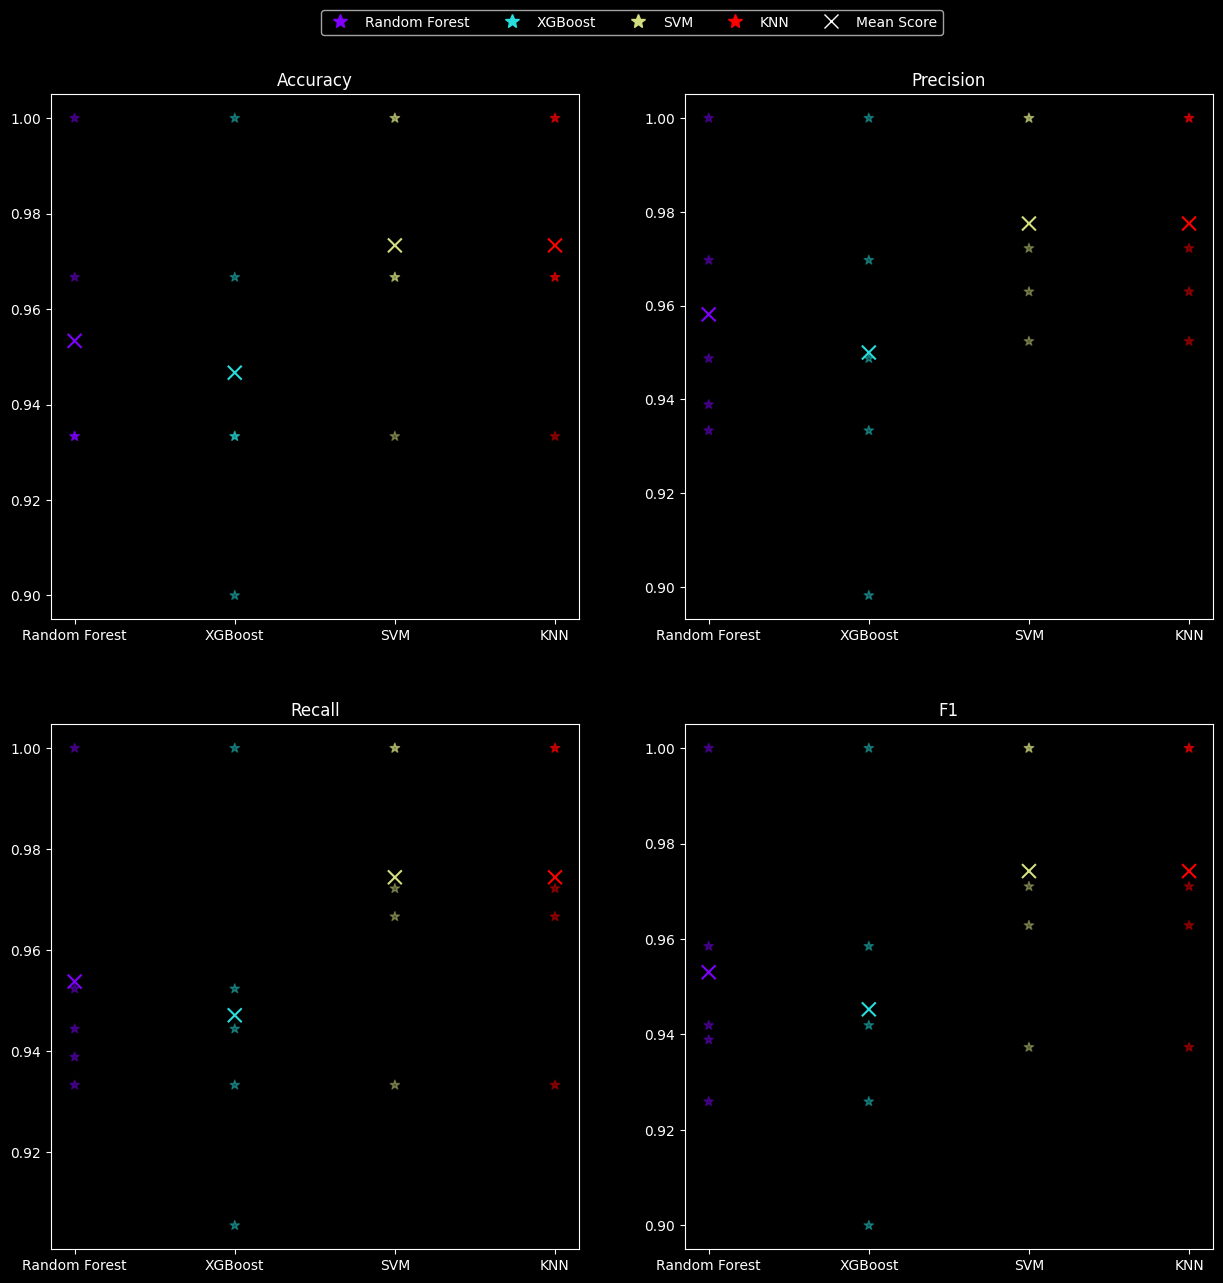

In [97]:
plt.figure(figsize=(15, 15))



plt.subplot(2, 2, 1)
plt.title("Accuracy")
for i in range(len(rf_cv_scores["test_accuracy"])):
    plt.scatter(['Random Forest', 'XGBoost', 'SVM', 'KNN'], [rf_cv_scores["test_accuracy"][i], xgb_cv_scores["test_accuracy"][i], svm_cv_scores["test_accuracy"][i], knn_cv_scores["test_accuracy"][i]],
                color=classifier_colors, s=50, marker='*', alpha=0.4)
plt.scatter(['Random Forest', 'XGBoost', 'SVM', 'KNN'], [rf_cv_scores["test_accuracy"].mean(), xgb_cv_scores["test_accuracy"].mean(), svm_cv_scores["test_accuracy"].mean(), knn_cv_scores["test_accuracy"].mean()],
            color=classifier_colors, s=100, marker='x')
handles = [
    Line2D([0], [0], color=classifier_colors[0], marker='*', linestyle='', markersize=10, label='Random Forest'),
    Line2D([0], [0], color=classifier_colors[1], marker='*', linestyle='', markersize=10, label='XGBoost'),
    Line2D([0], [0], color=classifier_colors[2], marker='*', linestyle='', markersize=10, label='SVM'),
    Line2D([0], [0], color=classifier_colors[3], marker='*', linestyle='', markersize=10, label='KNN'),
    Line2D([0], [0], color='white', marker='x', linestyle='', markersize=10, label='Mean Score')
]

# Create the legend
plt.legend(handles=handles, loc='lower center', bbox_to_anchor=(1.1, 1.1), ncol=5)

plt.subplot(2, 2, 2)
plt.title("Precision")
for i in range(len(rf_cv_scores["test_precision_macro"])):
    plt.scatter(['Random Forest', 'XGBoost', 'SVM', 'KNN'], [rf_cv_scores["test_precision_macro"][i], xgb_cv_scores["test_precision_macro"][i], svm_cv_scores["test_precision_macro"][i], knn_cv_scores["test_precision_macro"][i]],
                color=classifier_colors, s=50, marker='*', alpha=0.4)
plt.scatter(['Random Forest', 'XGBoost', 'SVM', 'KNN'], [rf_cv_scores["test_precision_macro"].mean(), xgb_cv_scores["test_precision_macro"].mean(), svm_cv_scores["test_precision_macro"].mean(), knn_cv_scores["test_precision_macro"].mean()],
            color=classifier_colors, s=100, marker='x')

plt.subplot(2, 2, 3)
plt.title("Recall")
for i in range(len(rf_cv_scores["test_recall_macro"])):
    plt.scatter(['Random Forest', 'XGBoost', 'SVM', 'KNN'], [rf_cv_scores["test_recall_macro"][i], xgb_cv_scores["test_recall_macro"][i], svm_cv_scores["test_recall_macro"][i], knn_cv_scores["test_recall_macro"][i]],
                color=classifier_colors, s=50, marker='*', alpha=0.4)
plt.scatter(['Random Forest', 'XGBoost', 'SVM', 'KNN'], [rf_cv_scores["test_recall_macro"].mean(), xgb_cv_scores["test_recall_macro"].mean(), svm_cv_scores["test_recall_macro"].mean(), knn_cv_scores["test_recall_macro"].mean()],
            color=classifier_colors, s=100, marker='x')

plt.subplot(2, 2, 4)
plt.title("F1")
for i in range(len(rf_cv_scores["test_f1_macro"])):
    plt.scatter(['Random Forest', 'XGBoost', 'SVM', 'KNN'], [rf_cv_scores["test_f1_macro"][i], xgb_cv_scores["test_f1_macro"][i], svm_cv_scores["test_f1_macro"][i], knn_cv_scores["test_f1_macro"][i]],
                color=classifier_colors, s=50, marker='*', alpha=0.4)
plt.scatter(['Random Forest', 'XGBoost', 'SVM', 'KNN'], [rf_cv_scores["test_f1_macro"].mean(), xgb_cv_scores["test_f1_macro"].mean(), svm_cv_scores["test_f1_macro"].mean(), knn_cv_scores["test_f1_macro"].mean()],
            color=classifier_colors, s=100, marker='x')


# Custom legend handles

# Show the plot
plt.show()